In [2]:
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np 
import seaborn as sns

In [4]:
doge_df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/AnalyzeStocks/master/dataset/Dogecoin%20Historical%20Data/DOGE-USD.csv")
doge_df.head()

,Date,Open,High,Low,Close,Volume
0,2014-09-17,0.000293,0.000299,0.000260,0.000268,1463600.0
1,2014-09-18,0.000268,0.000325,0.000267,0.000298,2215910.0
2,2014-09-19,0.000298,0.000307,0.000275,0.000277,883563.0
3,2014-09-20,0.000276,0.000310,0.000267,0.000292,993004.0
4,2014-09-21,0.000293,0.000299,0.000284,0.000288,539140.0


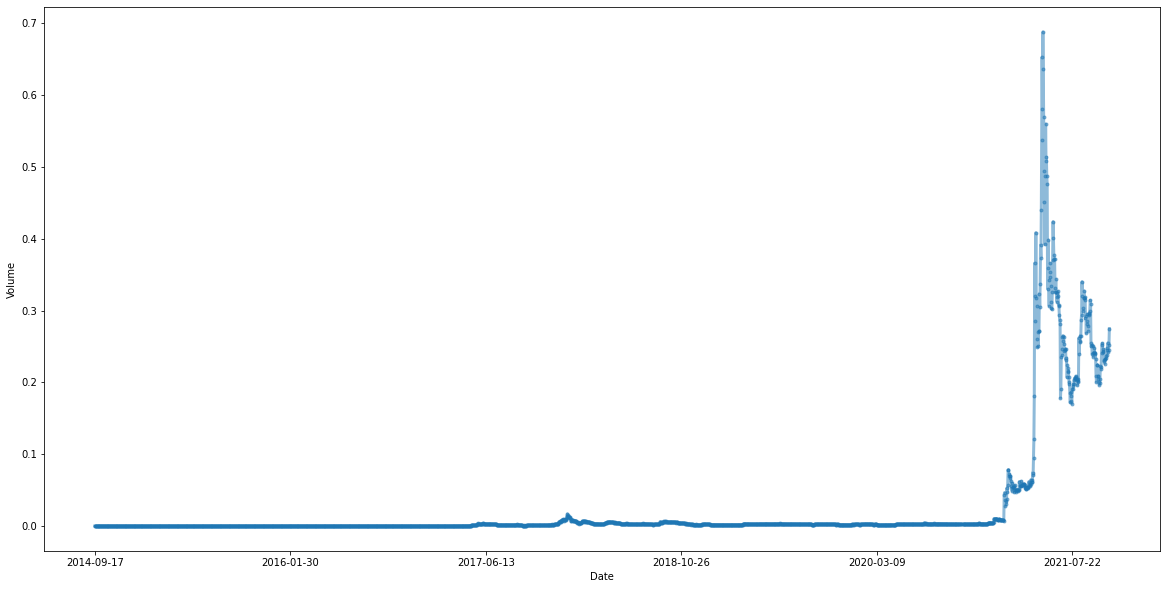

In [5]:
plt.figure(figsize = (20,10))
doge_df.groupby('Date')['Open'].mean().plot(marker='o',ls='-',lw=3,ms=3,mew=1,alpha=.5);
plt.xlabel('Date');
plt.ylabel('Volume');
plt.savefig('all_data.png')

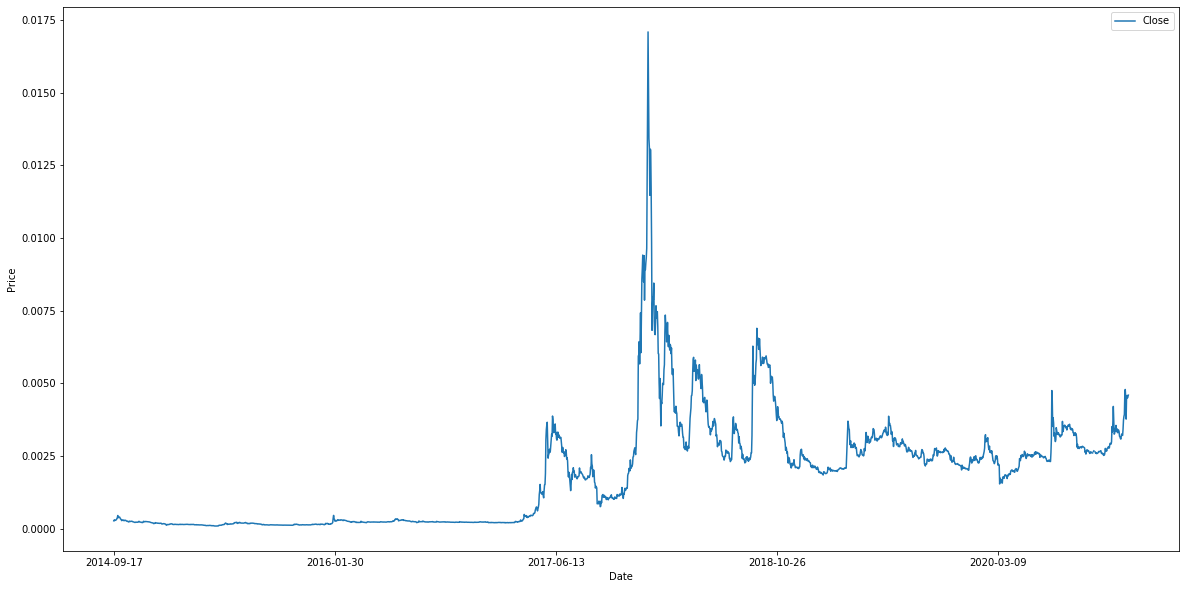

In [6]:
doge_df_last1 = doge_df.head(2295)

plt.figure(figsize = (20,10))
doge_df_last1.groupby('Date')['Close'].mean().plot();
plt.xlabel('Date');
plt.ylabel('Price');
plt.locator_params(axis="x", nbins=20)
plt.legend()
plt.savefig('first_data.png')

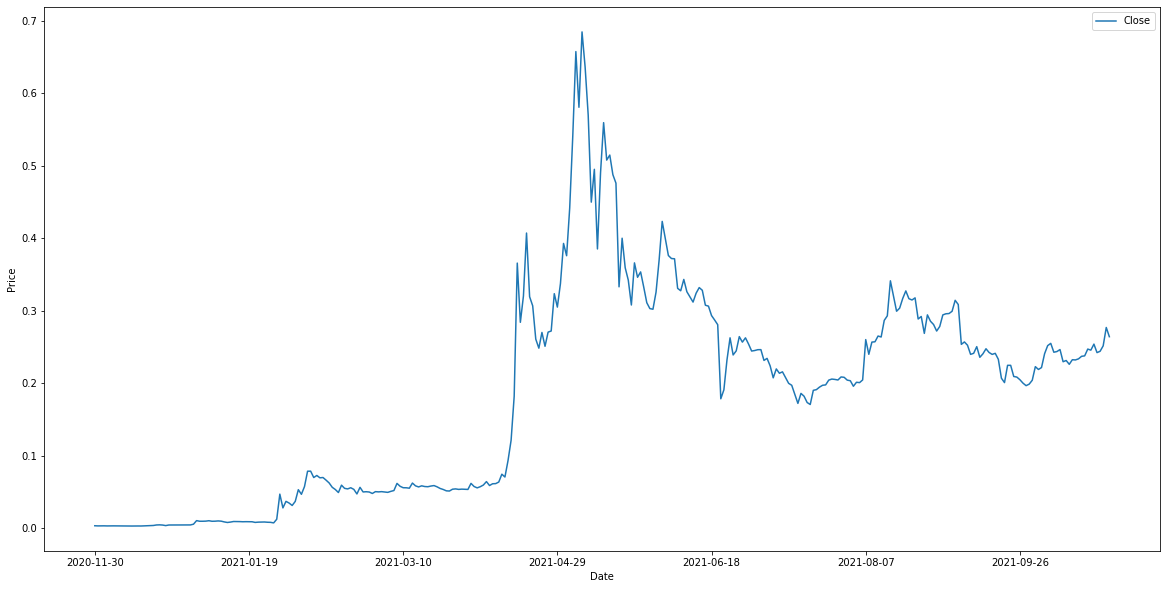

In [7]:
doge_df_last = doge_df.tail(330)

plt.figure(figsize = (20,10))
doge_df_last.groupby('Date')['Close'].mean().plot();
plt.xlabel('Date');
plt.ylabel('Price');
plt.locator_params(axis="x", nbins=20)
plt.legend()
plt.savefig('first_data.png')

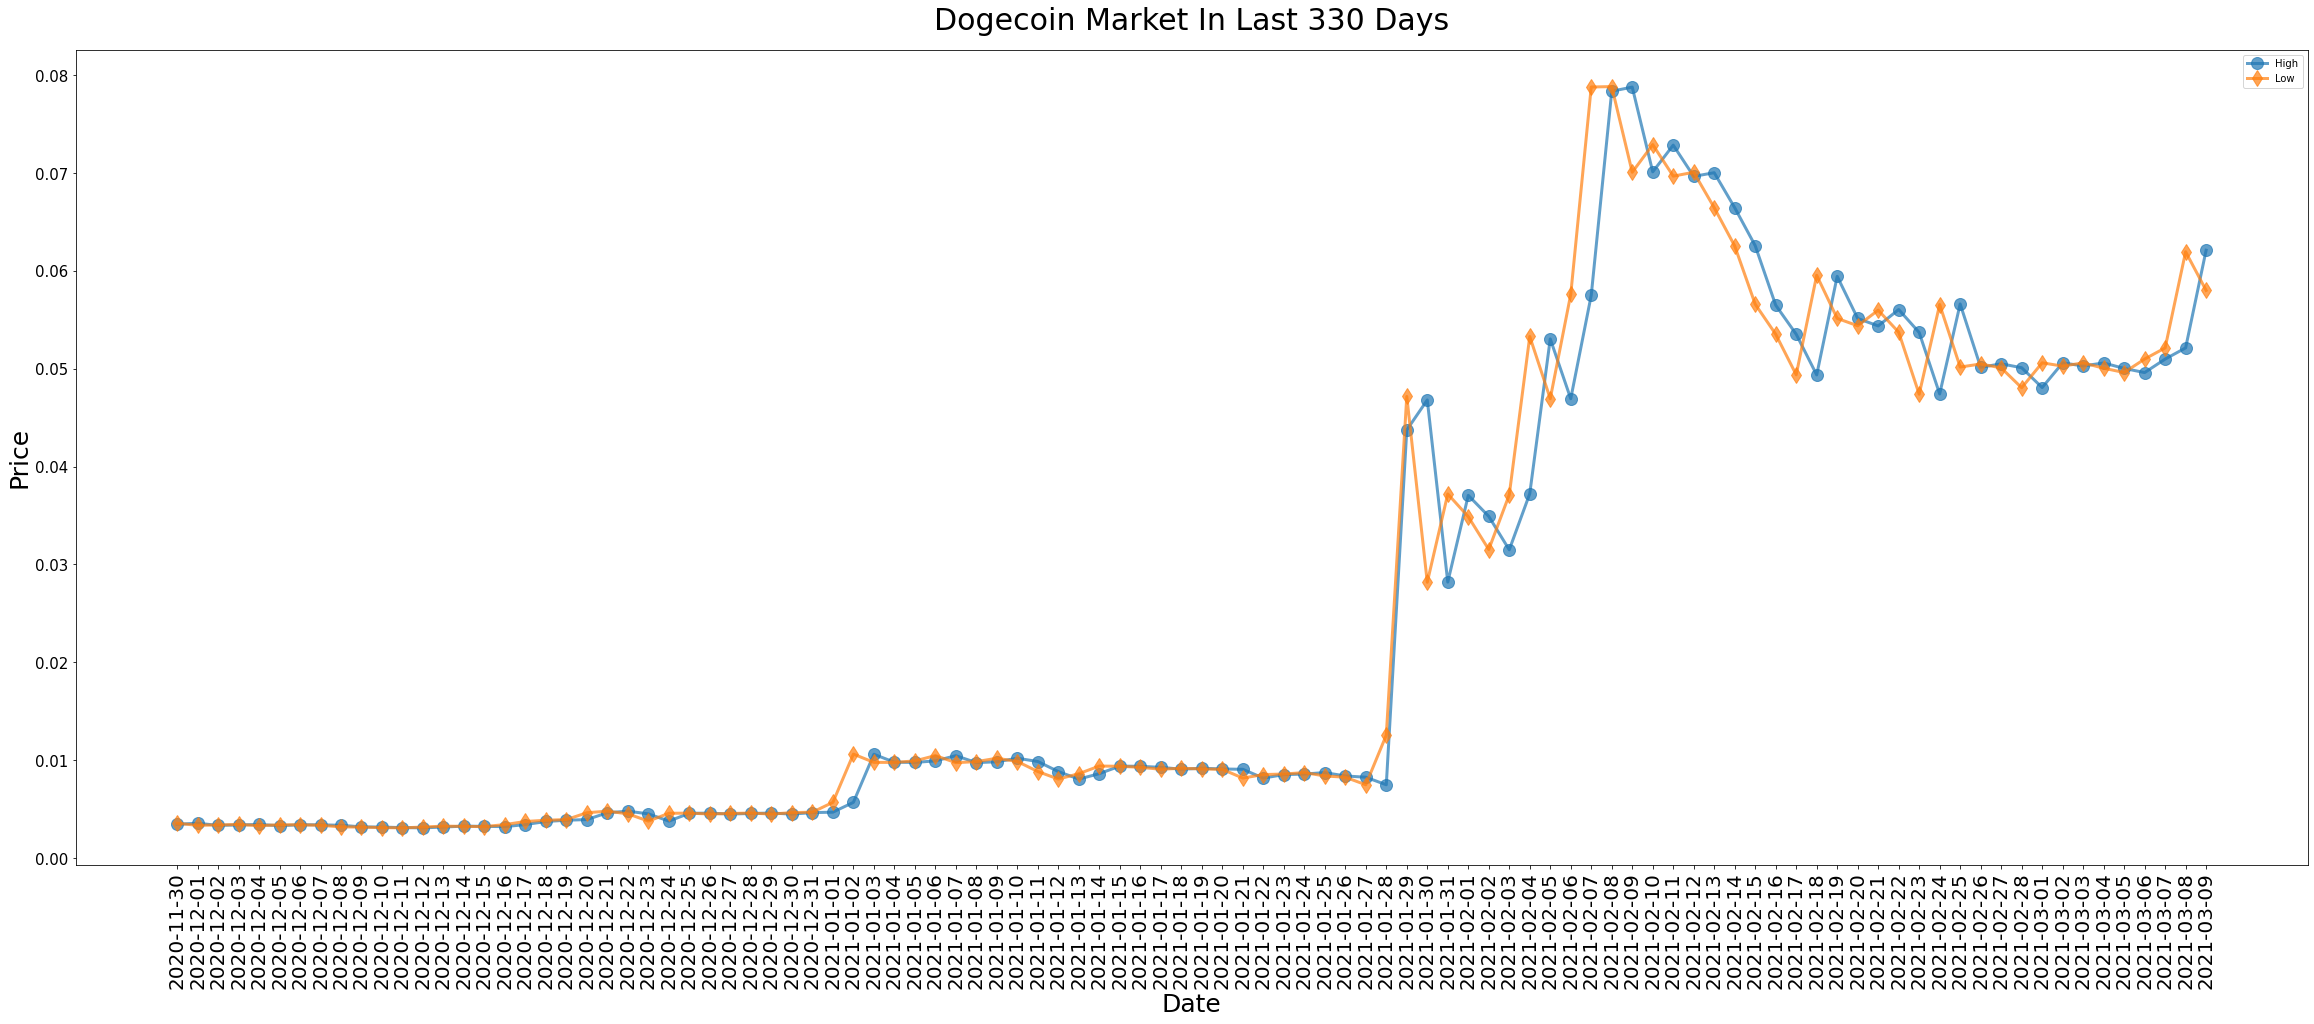

In [8]:
doge_df_last = doge_df_last.head(100)

plt.figure(figsize=(40,15))
plt.plot(doge_df_last.Date,doge_df_last.Open,marker='o',ls='-',lw=3,ms=12,mew=1,alpha=.7)
plt.plot(doge_df_last.Date,doge_df_last.Close,marker='d',ls='-',lw=3,ms=12,mew=1,alpha=.7)
plt.xlabel('Date',fontsize = 25)
plt.ylabel('Price',fontsize = 25)
plt.tick_params(axis='x', which='major', labelsize=20, rotation=90)
plt.tick_params(axis='y', which='major', labelsize=15)
plt.title("Dogecoin Market In Last 330 Days",fontsize = 30,pad=20);
plt.legend(['High','Low','Open','Close']);
plt.savefig('All_last100.png')

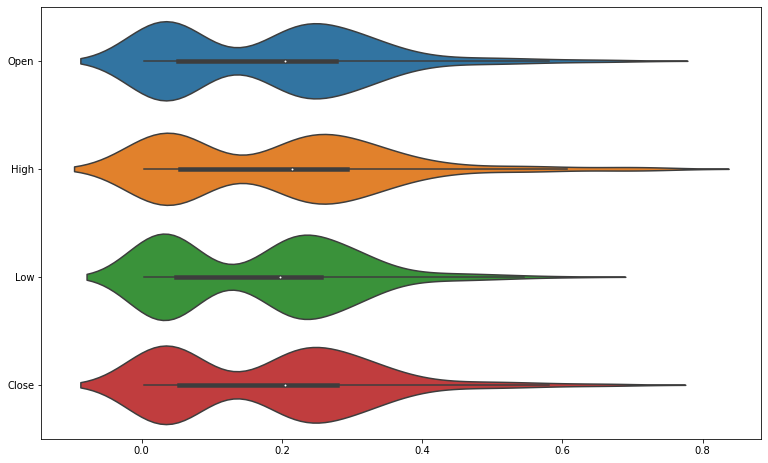

In [9]:
doge_df_test = doge_df.tail(330)
data_to_plot = [doge_df_test.Open, doge_df_test.High, doge_df_test.Low, doge_df_test.Close]

fig = plt.figure(figsize=(10,6))

ax = fig.add_axes([0,0,1,1])

bp = sns.violinplot(data=data_to_plot, orient='h',xlabel='Price')
bp.set_yticklabels(['Open','High','Low','Close'])

plt.show()

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

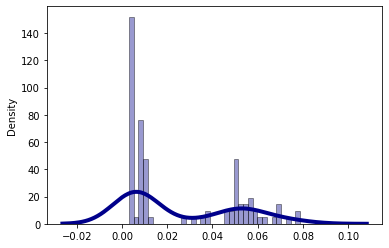

In [10]:
from sklearn.preprocessing import MinMaxScaler
close = doge_df_last.Close.iloc[:].to_numpy()
scaler = MinMaxScaler(feature_range=(0,1))
closeScaled = scaler.fit_transform(np.array(close).reshape(-1,1))
sns.distplot(close, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

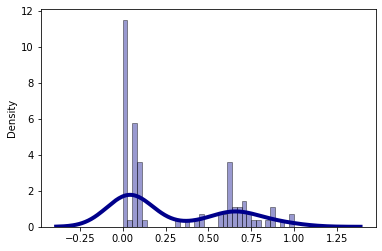

In [11]:
sns.distplot(closeScaled, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
